In [5]:
# Get overview from installed packages on Watson Studio
!pip list --isolated

Package                            Version   
---------------------------------- ----------
absl-py                            0.7.0     
alabaster                          0.7.12    
anaconda-client                    1.7.2     
anaconda-project                   0.8.2     
arcgis                             1.6.0     
asn1crypto                         0.24.0    
astor                              0.7.1     
astroid                            2.1.0     
astropy                            3.1.1     
astunparse                         1.6.2     
atomicwrites                       1.3.0     
attrs                              18.2.0    
autoai-libs                        1.10.5    
Babel                              2.6.0     
backcall                           0.1.0     
backports.os                       0.1.1     
backports.shutil-get-terminal-size 1.0.0     
beautifulsoup4                     4.7.1     
biopython                          1.72      
bitarray                          

In [15]:
# Installing basemap via conda
!conda install -c conda-forge basemap

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    basemap-1.3.0              |   py36hdd9a31b_2        15.2 MB  conda-forge
    libssh2-1.8.2              |       h22169c7_2         257 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geos-3.8.1                 |       he1b5a44_0         1.0 MB  conda-forge
    matplotlib-base-3.1.3      |   py36hef1b27d_0         6.6 MB
    curl-7.67.0                |       hbc83047_0         145 KB
    proj-7.0.0                 |       h5a2d94f_2         3.7 MB  conda-forge
    ca-certificates-2020.4.5.1 |       he

In [18]:
# Import libraries
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

# Data generation
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

# Use createDataPoints with the 3 inputs and store the output into variables X and y.
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

# Modeling of DBSCAN
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

### Distinguish outliers
### Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

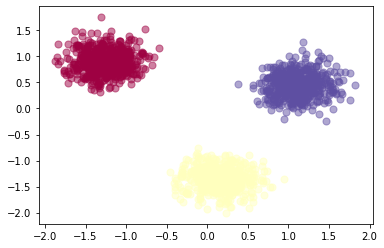

In [19]:
### Data Visualization

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

In [ ]:
# LAB EXERCISE - To better underestand differences between partitional and density-based clusteitng, try to cluster the above dataset into 3 clusters using k-Means.

# Setting up K-Means with 3 clusters
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

# Fit K-means model
k_means.fit(X)

# set labels for each point in the model
k_means_labels = k_means.labels_
k_means_labels

# Coordinates of cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

# Creating the visual plot

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()